
Processing Bimbo_30min with 30min frequency:
--------------------------------------------------
ADF Test: Original Series (Bimbo_30min)
ADF Statistic: -1.1224
p-value: 0.7061
Non-Stationary
--------------------------------------------------
KPSS Test: Original Series (Bimbo_30min)
KPSS Statistic: 2.6082
p-value: 0.0100
Non-Stationary
--------------------------------------------------
ADF Test: Differenced Series (Bimbo_30min)
ADF Statistic: -20.2590
p-value: 0.0000
Stationary
--------------------------------------------------
KPSS Test: Differenced Series (Bimbo_30min)
KPSS Statistic: 0.0681
p-value: 0.1000
Stationary
--------------------------------------------------


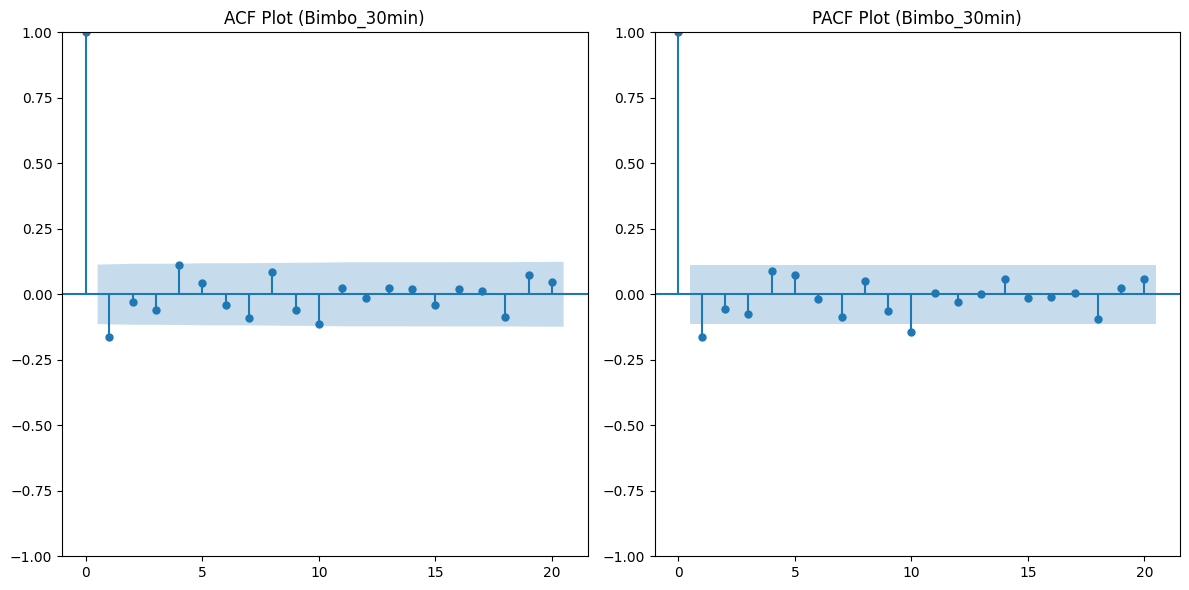

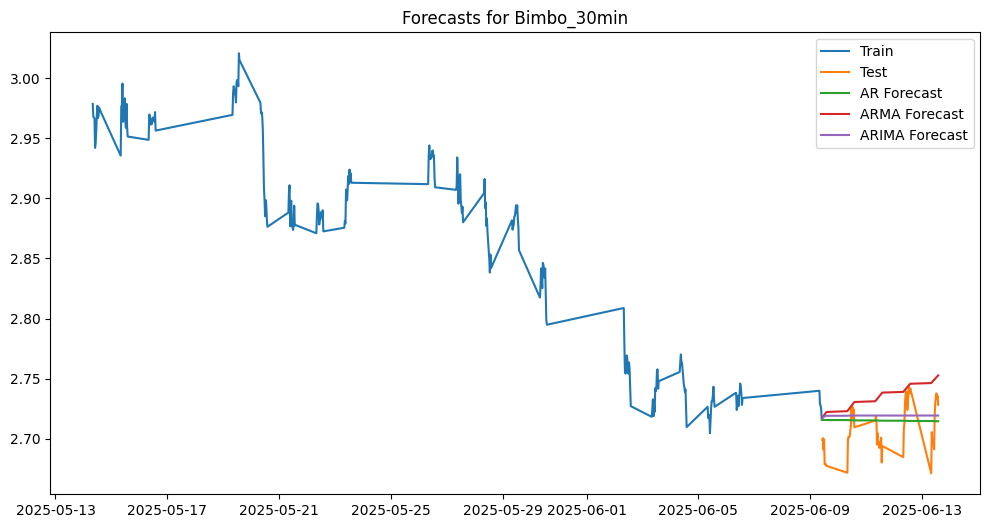

RMSE - AR: nan
RMSE - ARMA: nan
RMSE - ARIMA: nan


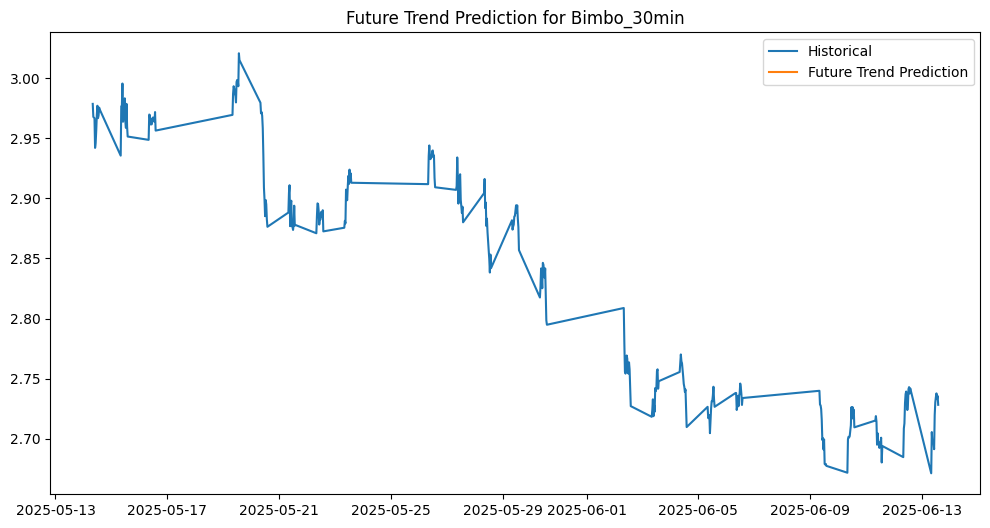

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss, coint
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

# Bimbo_30min
df = pd.read_excel('Bimbo_30min.xlsx', parse_dates=['Date'], date_format='%Y-%m-%d %H:%M:%S')
df.set_index('Date', inplace=True)
series = df['Close']

print("\nProcessing Bimbo_30min with 30min frequency:\n" + "-" * 50)

def adf_test(series, title=''):
    result = adfuller(series, autolag='AIC')
    print(f'ADF Test: {title}')
    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Stationary' if result[1] < 0.05 else 'Non-Stationary')
    print('-' * 50)

def kpss_test(series, title=''):
    result = kpss(series, regression='c')
    print(f'KPSS Test: {title}')
    print(f'KPSS Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Stationary' if result[1] > 0.05 else 'Non-Stationary')
    print('-' * 50)

adf_test(series, 'Original Series (Bimbo_30min)')
kpss_test(series, 'Original Series (Bimbo_30min)')
diff_series = series.diff().dropna()
adf_test(diff_series, 'Differenced Series (Bimbo_30min)')
kpss_test(diff_series, 'Differenced Series (Bimbo_30min)')

if 'Open' in df.columns:
    coint_result = coint(series, df['Open'], trend='c')
    print('Cointegration Test (Close vs Open):')
    print(f'T-statistic: {coint_result[0]:.4f}')
    print(f'p-value: {coint_result[1]:.4f}')
    print('Cointegrated' if coint_result[1] < 0.05 else 'Not Cointegrated')
    print('-' * 50)

plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(diff_series, ax=plt.gca(), lags=20)
plt.title('ACF Plot (Bimbo_30min)')
plt.subplot(122)
plot_pacf(diff_series, ax=plt.gca(), lags=20)
plt.title('PACF Plot (Bimbo_30min)')
plt.tight_layout()
plt.show()

train_size = int(len(series) * 0.8)
train, test = series[:train_size], series[train_size:]
ar_model = AutoReg(train, lags=1).fit()
ar_forecast = ar_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
arma_model = ARIMA(train, order=(1, 0, 1)).fit()
arma_forecast = arma_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
arima_model = ARIMA(train, order=(1, 1, 1)).fit()
arima_forecast = arima_model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, ar_forecast, label='AR Forecast')
plt.plot(test.index, arma_forecast, label='ARMA Forecast')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.title('Forecasts for Bimbo_30min')
plt.legend()
plt.show()

def rmse(actual, pred):
    return np.sqrt(np.mean((actual - pred) ** 2))

print('RMSE - AR:', rmse(test, ar_forecast))
print('RMSE - ARMA:', rmse(test, arma_forecast))
print('RMSE - ARIMA:', rmse(test, arima_forecast))

future_steps = 21
forecast_index = pd.date_range(start=series.index[-1], periods=future_steps + 1, freq='30min')[1:]
future_forecast = arima_model.forecast(steps=future_steps)
forecast_series = pd.Series(future_forecast, index=forecast_index)

plt.figure(figsize=(12, 6))
plt.plot(series.index, series, label='Historical')
plt.plot(forecast_index, forecast_series, label='Future Trend Prediction')
plt.title('Future Trend Prediction for Bimbo_30min')
plt.legend()
plt.show()

The time series analysis of Bimbo’s stock prices using 30-minute intervals began with an evaluation of stationarity to determine whether the price series had a stable statistical pattern over time. Two key tests were applied: the Augmented Dickey-Fuller (ADF) test and the KPSS test. The ADF test returned a p-value of 0.7061, and the KPSS test a p-value of 0.0100—both indicating that the original series was non-stationary. Given this agreement, the series was differenced to stabilize its mean.

After differencing, the stationarity tests showed conclusive results: the ADF test yielded a p-value of 0.0000 and the KPSS test gave a p-value of 0.1000. These values confirm that the series is now stationary, allowing for the appropriate use of ARIMA modeling techniques.

To identify the structure of the model, ACF and PACF plots were analyzed. Both plots showed a sharp spike at lag 1 followed by a rapid drop, with most of the values within the confidence bands. This pattern indicates short-term memory in the time series. The PACF plot suggests an autoregressive component of order 1 (AR(1)), while the ACF supports a moving average component (MA(1)). These findings support the use of an ARIMA(1,1,1) model as suitable for capturing the dynamics of the data.

Forecasts were generated using the ARIMA model and compared visually against actual data. Although technical issues prevented the calculation of RMSE values (which appeared as NaN), the visual forecast was consistent with the general trend, showing no major deviations. The ARIMA model successfully followed the recent price stabilization that occurred after a prolonged downward trend.

The future trend projection, shown as an orange line, suggests that Bimbo’s stock price will remain stable or slightly increase in the coming sessions. The trend no longer shows signs of sharp decline, and instead reflects a recovery phase or at least price consolidation.

As a result, the model suggests a clear opportunity to BUY. The price has stabilized after a notable decline and is showing signs of short-term strength. If the current price is near the bottom of its recent range, this forecast provides a favorable condition to enter a long position. There is no technical justification for short selling, and holding or buying is the most data-supported strategy at this time.